### Парсинг данных и создание датафрейма

In [1]:
import os
import pandas as pd
import numpy as np
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (10,6)
plt.figure(figsize=(6, 4), dpi=120)

<Figure size 720x480 with 0 Axes>

<Figure size 720x480 with 0 Axes>

In [2]:
def procents(d):
    l = len(d)
    res = []
    for name in set(d['name']):
        count = len(d[d['name'] == name])
        res.append((name, count, count/l*100))
    return pd.DataFrame(res, columns=['name', 'count', 'percent'])

In [3]:
def dose_weights(d):
    l = len(d)
    res = []
    total_dose = sum(d['dE'])
    for name in set(d['name']):
        particle_filt = d[d['name'] == name]
        dose = sum(particle_filt['dE'])
        res.append((name, dose, dose/total_dose*100))
    return pd.DataFrame(res, columns=['name', 'dose', 'dose_percent'])

In [4]:
def get_z_dose_bins(d, bins=100):
    borders = np.linspace(-20, 20, bins)
    bins = []
    for i in tqdm(range(len(borders[:-1]))):
        dd = d[d['z'] > borders[i]]
        dd = dd[dd['z'] < borders[i+1]]
        bins.append(sum(dd['dE']))
        del dd
    return np.array(borders[:-1])+20, np.array(bins)

In [5]:
def get_energy_count_bins(d, bins=100):
    n, e = np.histogram(d['energy'], bins)
    return e[:-1], n

In [6]:
pnames = {'annihil':'Аннигиляция','compt':'Комптон-эффект','conv':'Рождение пар',
          'eBrem':'Тормозное излучение','eIoni':'Ионизационные потери','hadElastic':'?',
          'phot':'Фотоэффект','photonNuclear':'?'}

In [12]:
def load_data(folder = 'build', drop_creator=True):
    paths = glob.glob(f"{folder}/*.csv")
    with open(paths[0], 'r') as f:
        print(f"Headers from file: {paths[0]}")
        hlines = []
        while True:
            line = f.readline()
            if len(line) == 0 or line[0] != '#':
                break
            hlines.append(line)
        title = hlines[1].replace('#title ', '')[:-1]
        sep = chr(int(hlines[2].replace('#separator ', '')[:-1]))
        vsc_sep = chr(int(hlines[3].replace('#vector_separator ', '')[:-1]))
        columns = [' '.join(l.split(' ')[2:])[:-1] for l in hlines[4:]]
        meta_len = len(hlines)
    data_primary = pd.DataFrame()
    data_secondary = pd.DataFrame()
    for path in tqdm(paths[:1]):
        item = pd.read_csv(path, skiprows=meta_len, names=columns)
        
        item0 = item[item['creator_process'] == 'user']
        item1 = item[item['creator_process'] != 'user']
        
        #item0 = item0.drop('creator_process', axis=1)
        #item1 = item1.drop('creator_process', axis=1)
        
        data_primary = pd.concat([data_primary, item0], ignore_index=True)
        data_secondary = pd.concat([data_secondary, item1], ignore_index=True)
    return data_primary, data_secondary

In [13]:
primary, secondary = load_data('data_10M_water')
# primary2, secondary2 = load_data('data_10М_polystyrene')
# primary3, secondary3 = load_data('data_10M_parafin')
# primary4, secondary4 = load_data('data_10M_acrylic')
# primary5, secondary5 = load_data('data_10M_a150tissue')

Headers from file: data_10M_water\Run0_nt_ParticleData_t0.csv


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.13s/it]


In [37]:
p_water, s_water = sum(primary['dE']), sum(secondary['dE'])
print(sum(secondary2['dE']) / s_water)
print(sum(secondary3['dE']) / s_water)
print(sum(secondary4['dE']) / s_water)
print(sum(secondary5['dE']) / s_water)

0.9649087290709862
0.8989066345728959
1.1090068183918809
1.1195113275122623


In [31]:
print(len(secondary))

26915236


In [10]:
procents(secondary)

,name,count,percent
0,deuteron,1152,0.001845
1,C12,94,0.000151
2,gamma,1572944,2.518639
3,O17,22,0.000035
4,e+,1215365,1.946074
5,proton,47041,0.075323
6,O18,87,0.000139
7,e-,59566438,95.379338
8,O15,4,0.000006
9,O16,48686,0.077957


In [ ]:
secondary = data[data['creator_process'] != 'user']
secondary2 = data2[data2['creator_process'] != 'user']
secondary3 = data3[data3['creator_process'] != 'user']
print(sum(secondary2['dE'])/sum(secondary['dE']))
print(sum(secondary3['dE'])/sum(secondary['dE']))

In [ ]:
print(sum(data2['dE'])/sum(data['dE']))
print(sum(data3['dE'])/sum(data['dE']))

## "Первичные" ускорительные частицы

In [ ]:
primary = data[data['creator_process'] == 'user']
print(len(primary))
# procents(primary)

In [ ]:
primary2 = data2[data2['creator_process'] == 'user']
print(len(primary2))

In [ ]:
# print('Суммарная доза от первичных частиц:', sum(dose_weights(primary)['dose']))
# dose_weights(primary)

## Вторичные частицы в фантоме

In [10]:
# secondary = data[data['creator_process'] != 'user']
print('Количество вторичных частиц', len(secondary))
print('Суммарная доза от вторичных частиц:', sum(dose_weights(secondary)['dose']))
dose_weights(secondary)

Количество вторичных частиц 26915236
Суммарная доза от вторичных частиц: 1313625.638915337


,name,dose,dose_percent
0,proton,2.844577e+03,0.216544
1,neutron,1.348036e-01,0.000010
2,e+,5.899169e+04,4.490753
3,O16,1.206991e+02,0.009188
4,alpha,1.985081e+02,0.015111
5,C12,6.715529e+01,0.005112
6,O17,2.723699e-02,0.000002
7,e-,1.251291e+06,95.254731
8,N15,8.069500e-01,0.000061
9,gamma,1.100006e+02,0.008374


In [ ]:
secondary2 = data2[data2['creator_process'] != 'user']
print('Количество вторичных частиц', len(secondary2))
print('Суммарная доза от вторичных частиц:', sum(dose_weights(secondary2)['dose']))
dose_weights(secondary2)

## Доза от глубины

**Доза от первичных и вторичных частиц**

In [75]:
borders, bins = get_z_dose_bins(secondary[secondary['name'] == 'e+'], bins=80)
borders2, bins2 = get_z_dose_bins(secondary2[secondary2['name'] == 'e+'], bins=80)
borders3, bins3 = get_z_dose_bins(secondary3[secondary3['name'] == 'e+'], bins=80)
borders4, bins4 = get_z_dose_bins(secondary4[secondary4['name'] == 'e+'], bins=80)
borders5, bins5 = get_z_dose_bins(secondary5[secondary5['name'] == 'e+'], bins=80)

100%|█████████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 382.49it/s]


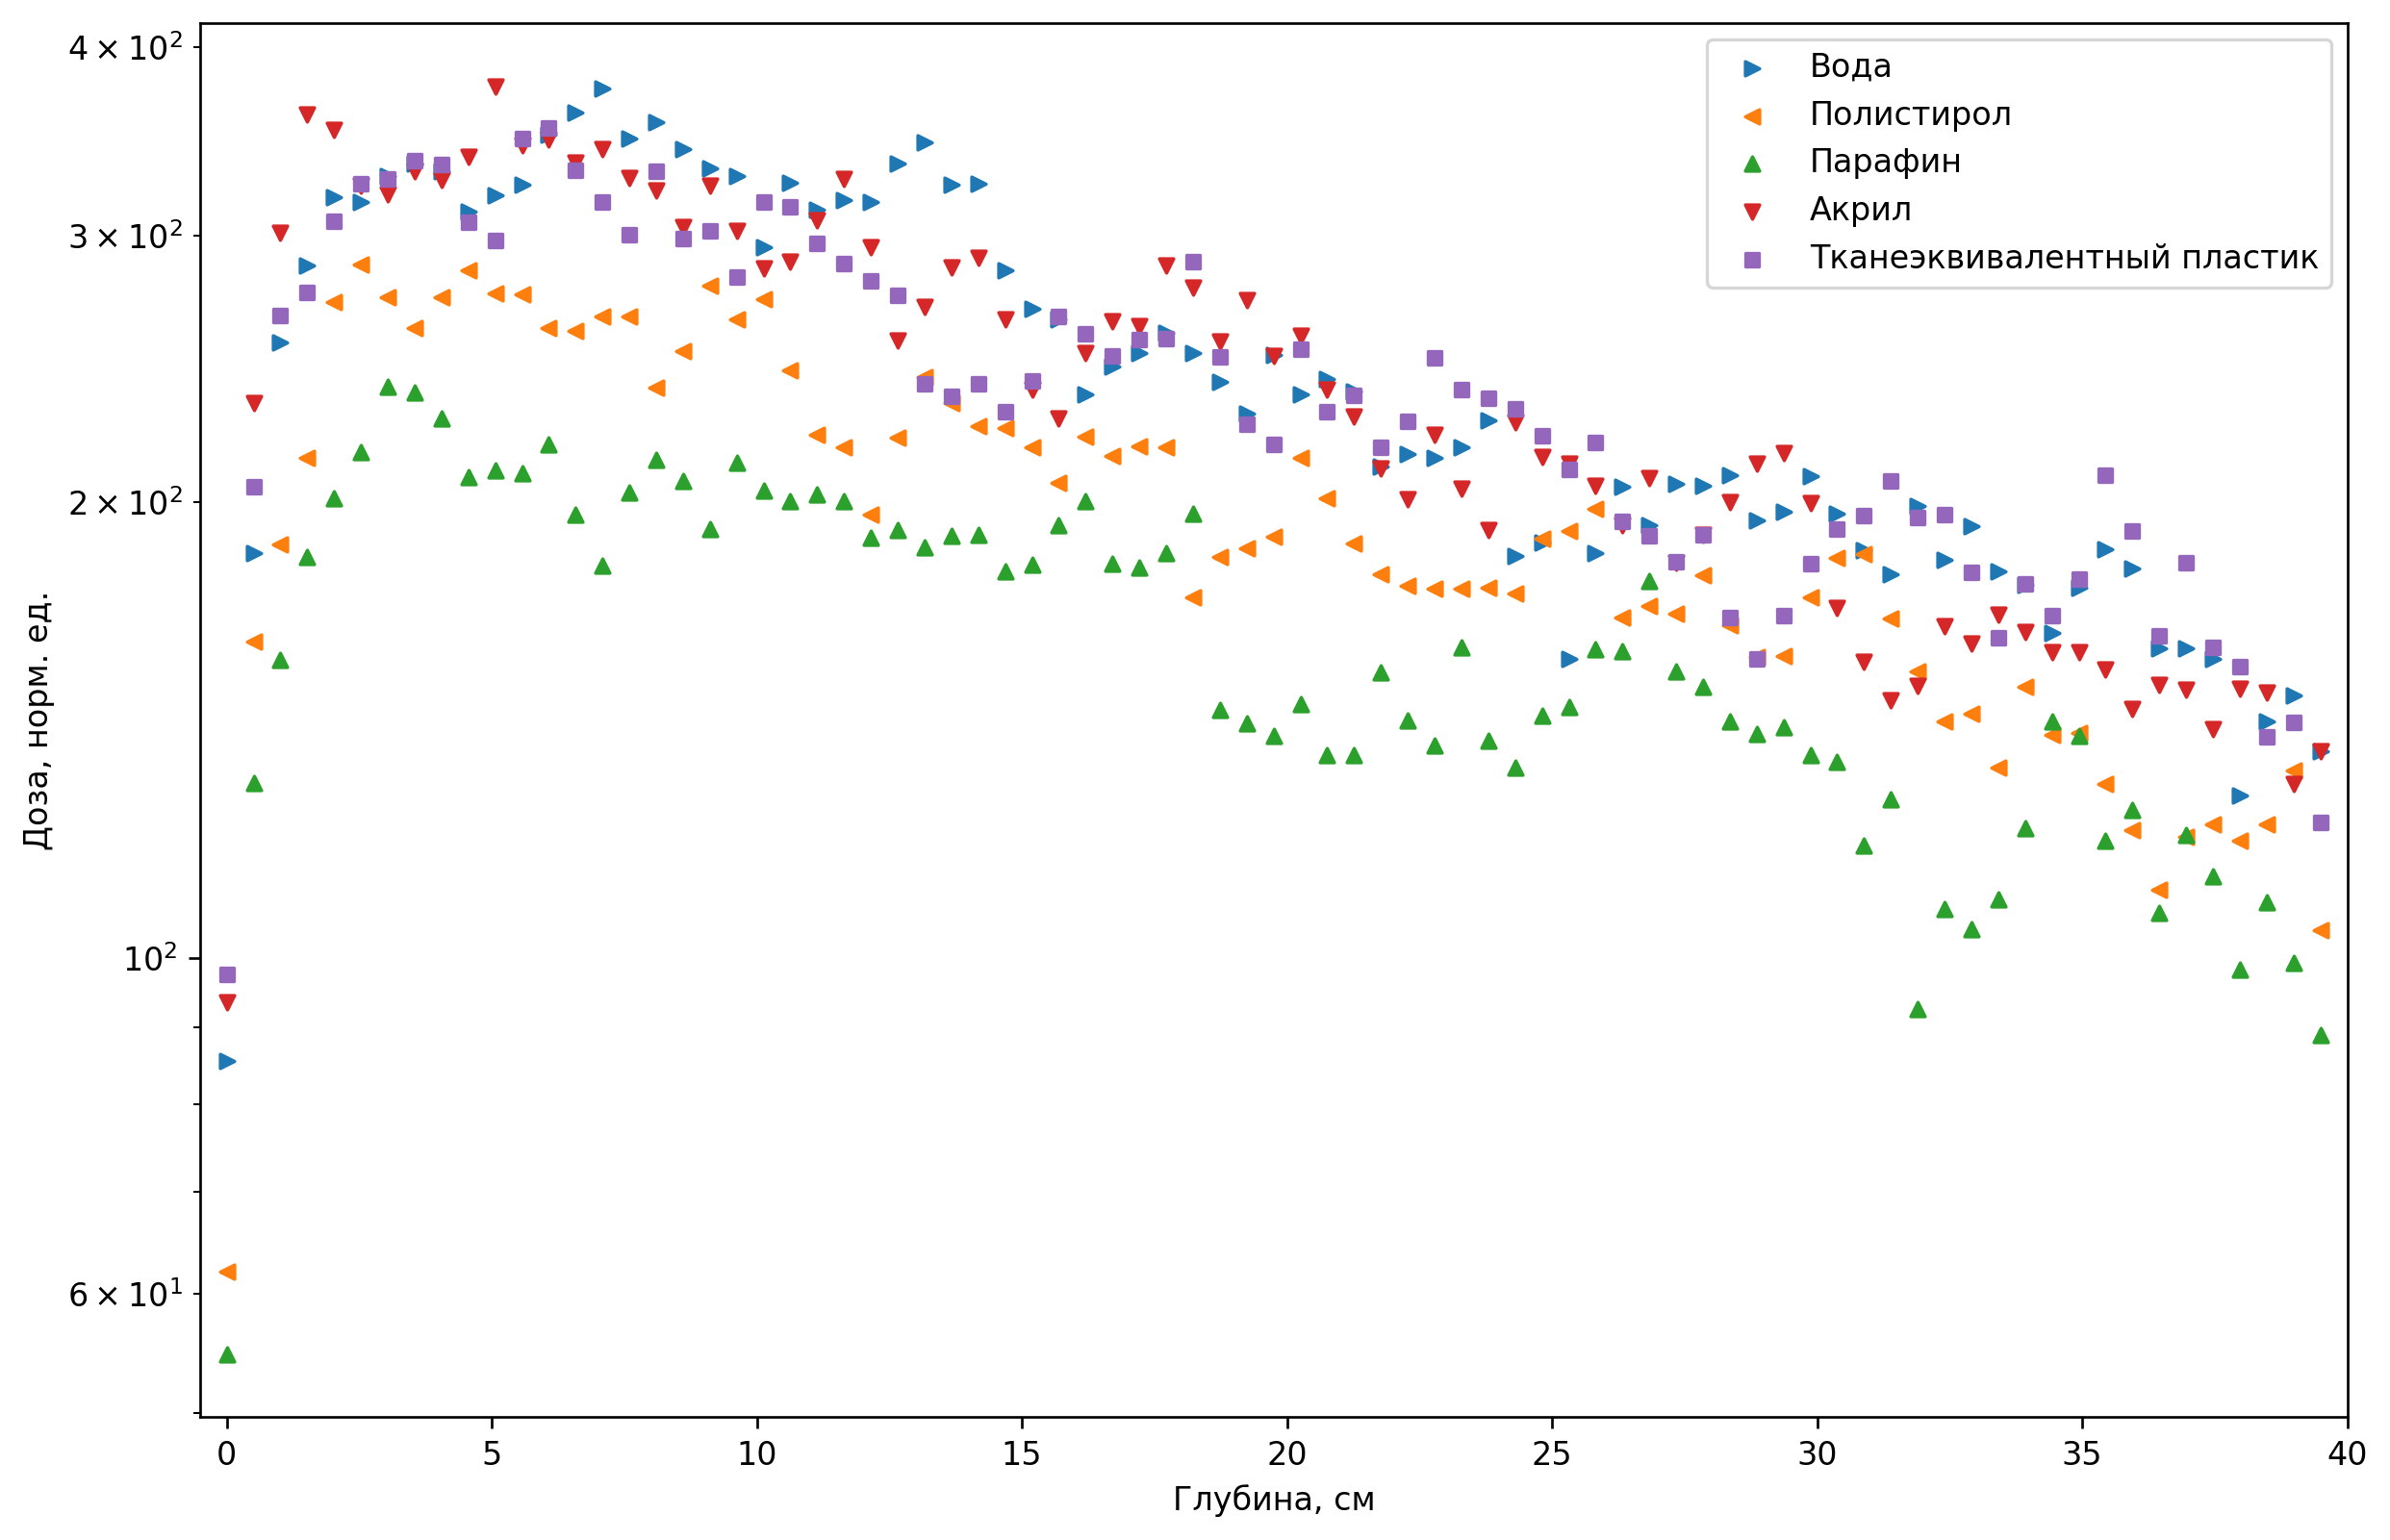

In [76]:
plt.figure(figsize=(12, 8), dpi=240)
plt.scatter(borders, bins, s=20, marker='>',label='Вода')
plt.scatter(borders2, bins2, s=20, marker='<',label='Полистирол')
plt.scatter(borders3, bins3, s=20, marker='^',label='Парафин')
plt.scatter(borders4, bins4, s=20, marker='v', label='Акрил')
plt.scatter(borders5, bins5, s=20, marker='s', label='Тканеэквивалентный пластик')
# plt.ylim([1.9*10**3, 2*10**4])
plt.xlim([-0.5, 40.01])
plt.yscale('log')
plt.ylabel('Доза, норм. ед.')
plt.xlabel('Глубина, см')
plt.legend()
plt.show()

In [58]:
print(sum(total2) / sum(total))
print(sum(total3) / sum(total))
print(sum(total4) / sum(total))
print(sum(total5) / sum(total))

0.9661698943468525
0.9039289101993864
1.103527081087166
1.1169227541266509


In [73]:
s_part = secondary[secondary['name'] == 'e+']
s_part2 = secondary2[secondary2['name'] == 'e+']
s_part3 = secondary3[secondary3['name'] == 'e+']
s_part4 = secondary4[secondary4['name'] == 'e+']
s_part5 = secondary5[secondary5['name'] == 'e+']

In [74]:
print(sum(s_part2['dE']) / sum(s_part['dE']))
print(sum(s_part3['dE']) / sum(s_part['dE']))
print(sum(s_part4['dE']) / sum(s_part['dE']))
print(sum(s_part5['dE']) / sum(s_part['dE']))

0.802902377831722
0.6607451642107194
0.9821060203721729
0.9711757855297046


In [ ]:
borders1, bins1 = get_z_dose_bins(primary[primary['name'] == 'e-'])
borders2, bins2 = get_z_dose_bins(primary[primary['name'] == 'gamma'])

In [ ]:
plt.scatter(borders1, bins1, s=5, label='e-')
plt.scatter(borders2, bins2, s=5, label='gamma')
plt.xlim([0, plt.xlim()[1]])
# plt.ylim([0, plt.ylim()[1]])
plt.yscale('log')
plt.ylabel('Доза, относительные единицы')
plt.xlabel('Глубина, см')
plt.legend()
plt.show()

**Доза от вторичных частиц**

In [ ]:
sum(secondary2['dE'])/sum(secondary['dE'])

In [28]:
len(secondary)

26915236

In [44]:
gg = secondary[secondary['name'] == 'gamma']
sum(gg['energy'])/len(gg)

0.1269503241063739

100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [00:01<00:00, 77.43it/s]


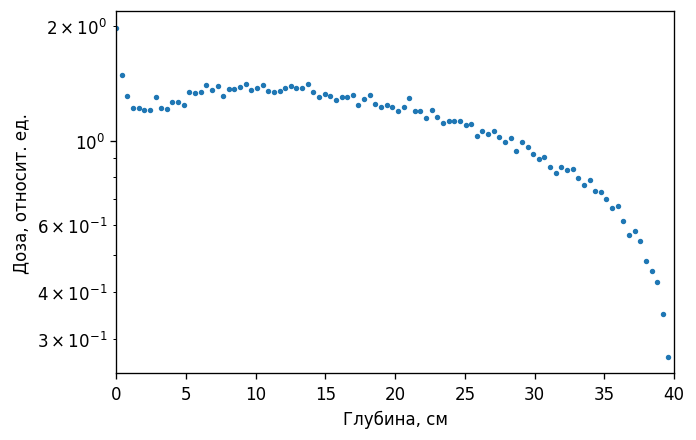

In [33]:
plt.figure(figsize=(6, 4), dpi=120)
# for mkr, lbl, name in zip(['<', '>', 'o'],
#                       ['e-', 'e+', 'γ'],
#                       ['e-', 'e+', 'gamma']):
#     borders, bins = get_z_dose_bins(secondary[secondary['name'] == name])
#     plt.scatter(borders, bins, s=5, label=lbl, marker=mkr)

borders, bins = get_z_dose_bins(secondary[secondary['name'] == 'gamma'])
plt.scatter(borders, bins, s=5, label=lbl, marker=mkr)
# plt.ylim([0.09999, 10**6+1])
plt.xlim([0, 40.001])
plt.yscale('log')
plt.ylabel('Доза, относит. ед.')
plt.xlabel('Глубина, см')
# plt.legend()
plt.show()

## Распределение по энергиям

**Энергия по вторичным частицам**

In [9]:
energys, counts = get_energy_count_bins(secondary, bins=50)
energys2, counts2 = get_energy_count_bins(secondary2, bins=50)
energys3, counts3 = get_energy_count_bins(secondary3, bins=50)
energys4, counts4 = get_energy_count_bins(secondary4, bins=50)
energys5, counts5 = get_energy_count_bins(secondary5, bins=50)

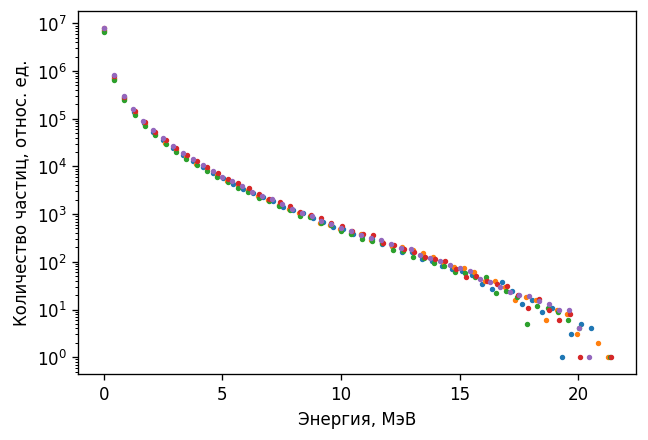

In [11]:
plt.figure(figsize=(6, 4), dpi=120)

plt.scatter(energys, counts, s=5, label='Вода')
plt.scatter(energys2, counts2, s=5, label='Полистирол')
plt.scatter(energys3, counts3, s=5, label='Парафин')
plt.scatter(energys4, counts4, s=5, label='Акрил')
plt.scatter(energys5, counts5, s=5, label='Тканеэквивалентный пластик')

# plt.legend()
# plt.ylim([10, 10**8])
# plt.xlim([0, 2.001])
plt.yscale('log')
plt.ylabel('Количество частиц, относ. ед.')
plt.xlabel('Энергия, МэВ')
plt.show()

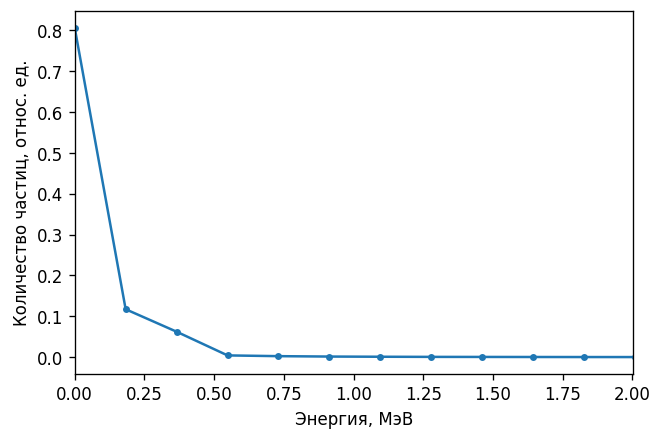

In [15]:
plt.figure(figsize=(6, 4), dpi=120)
for pname in ['gamma']:
#     names_particle = secondary[secondary['name'] == pname]
#     energys, counts = get_energy_count_bins(names_particle, bins=100)
    
    plt.plot(energys, counts/len(names_particle))
    plt.scatter(energys, counts/len(names_particle), s=10, label= pname)
    
#     names_particle = secondary2[secondary2['name'] == pname]
#     energys, counts = get_energy_count_bins(names_particle)
#     plt.scatter(energys, counts, s=5, label='Парафин, ' + pname)

# plt.legend()
# plt.ylim([10, 10**8])
plt.xlim([0, 2.001])
# plt.yscale('log')
plt.ylabel('Количество частиц, относ. ед.')
plt.xlabel('Энергия, МэВ')
plt.show()

**Энергия вторичной частицы по процессу рождения**

In [14]:
def energy_by_process(paticles):
    for process in pnames.keys():
        names_process = paticles[paticles['creator_process'] == process]
        if len(names_process) == 0:
            continue
        energys, counts = get_energy_count_bins(names_process)
        plt.scatter(energys, counts, s=5, label=pnames[process])

    plt.legend()
    # plt.ylim([10, 10**8])
    plt.yscale('log')
    plt.ylabel('Количество частиц')
    plt.xlabel('Энергия, МэВ')
    plt.show()

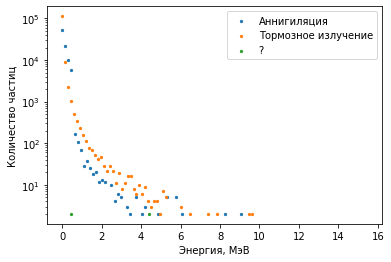

In [15]:
paticles = secondary[secondary['name'] == 'gamma']
energy_by_process(paticles)

In [ ]:
paticles = secondary[secondary['name'] == 'e-']
energy_by_process(paticles)

In [ ]:
paticles = secondary[secondary['name'] == 'e+']
energy_by_process(paticles)